# importing and performing eda on data

In [1]:
import pandas as pd 
import numpy as np  

In [2]:
df = pd.read_csv('activity.csv')

In [3]:
df.head(5)

,App name,Date,Time,Duration
0,App Usage,18/03/2024,2:54:16 pm,0:00:01
1,WhatsApp,18/03/2024,2:54:04 pm,0:00:11
2,App Usage,18/03/2024,2:52:58 pm,0:00:59
3,Activity history enabled,18/03/2024,2:52:58 pm,0:00:00
4,App Usage,18/03/2024,2:52:09 pm,0:00:00


In [4]:
df['DateTime'] = df['Date'] + ' ' + df['Time']

In [5]:
df.head(10)

,App name,Date,Time,Duration,DateTime
0,App Usage,18/03/2024,2:54:16 pm,0:00:01,18/03/2024 2:54:16 pm
1,WhatsApp,18/03/2024,2:54:04 pm,0:00:11,18/03/2024 2:54:04 pm
2,App Usage,18/03/2024,2:52:58 pm,0:00:59,18/03/2024 2:52:58 pm
3,Activity history enabled,18/03/2024,2:52:58 pm,0:00:00,18/03/2024 2:52:58 pm
4,App Usage,18/03/2024,2:52:09 pm,0:00:00,18/03/2024 2:52:09 pm
5,App Usage,18/03/2024,2:52:07 pm,0:00:01,18/03/2024 2:52:07 pm
6,App Usage,18/03/2024,2:51:57 pm,0:00:06,18/03/2024 2:51:57 pm
7,Package installer,18/03/2024,2:50:47 pm,0:01:09,18/03/2024 2:50:47 pm
8,WhatsApp,18/03/2024,2:50:45 pm,0:00:02,18/03/2024 2:50:45 pm
9,Package installer,18/03/2024,2:50:45 pm,0:00:00,18/03/2024 2:50:45 pm


In [6]:
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)

In [7]:
df['DateTime'] = pd.to_datetime(df.DateTime,dayfirst=True)

In [8]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5685 entries, 0 to 5684
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   App name  5684 non-null   object         
 1   Date      5682 non-null   datetime64[ns] 
 2   Time      5682 non-null   object         
 3   Duration  5682 non-null   timedelta64[ns]
 4   DateTime  5682 non-null   datetime64[ns] 
dtypes: datetime64[ns](2), object(2), timedelta64[ns](1)
memory usage: 222.2+ KB


In [10]:
# learned how to get total seconds from timedelta dtype
df['Duration'][7].total_seconds()

69.0

In [11]:
df['total_seconds'] = df['Duration'].dt.total_seconds()

In [12]:
df.head(10)

,App name,Date,Time,Duration,DateTime,total_seconds
0,App Usage,2024-03-18,2:54:16 pm,0 days 00:00:01,2024-03-18 14:54:16,1.0
1,WhatsApp,2024-03-18,2:54:04 pm,0 days 00:00:11,2024-03-18 14:54:04,11.0
2,App Usage,2024-03-18,2:52:58 pm,0 days 00:00:59,2024-03-18 14:52:58,59.0
3,Activity history enabled,2024-03-18,2:52:58 pm,0 days 00:00:00,2024-03-18 14:52:58,0.0
4,App Usage,2024-03-18,2:52:09 pm,0 days 00:00:00,2024-03-18 14:52:09,0.0
5,App Usage,2024-03-18,2:52:07 pm,0 days 00:00:01,2024-03-18 14:52:07,1.0
6,App Usage,2024-03-18,2:51:57 pm,0 days 00:00:06,2024-03-18 14:51:57,6.0
7,Package installer,2024-03-18,2:50:47 pm,0 days 00:01:09,2024-03-18 14:50:47,69.0
8,WhatsApp,2024-03-18,2:50:45 pm,0 days 00:00:02,2024-03-18 14:50:45,2.0
9,Package installer,2024-03-18,2:50:45 pm,0 days 00:00:00,2024-03-18 14:50:45,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5685 entries, 0 to 5684
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   App name       5684 non-null   object         
 1   Date           5682 non-null   datetime64[ns] 
 2   Time           5682 non-null   object         
 3   Duration       5682 non-null   timedelta64[ns]
 4   DateTime       5682 non-null   datetime64[ns] 
 5   total_seconds  5682 non-null   float64        
dtypes: datetime64[ns](2), float64(1), object(2), timedelta64[ns](1)
memory usage: 266.6+ KB


In [14]:
# total seconds in float but we dont need float thats why convert it t int
#df['total_seconds'] = df['total_seconds'].astype(int)


In [15]:
# there are na values present in my data lets deal with them
df.isnull().mean()*100

App name         0.01759
Date             0.05277
Time             0.05277
Duration         0.05277
DateTime         0.05277
total_seconds    0.05277
dtype: float64

In [16]:
# we can see that missing data is very small (<5%) thats why we can perform cca complete case analysis
df.dropna(inplace=True)

In [17]:
# total seconds in float but we dont need float thats why convert it t int
df['total_seconds'] = df['total_seconds'].astype(int)

In [18]:
df.head(5)

,App name,Date,Time,Duration,DateTime,total_seconds
0,App Usage,2024-03-18,2:54:16 pm,0 days 00:00:01,2024-03-18 14:54:16,1
1,WhatsApp,2024-03-18,2:54:04 pm,0 days 00:00:11,2024-03-18 14:54:04,11
2,App Usage,2024-03-18,2:52:58 pm,0 days 00:00:59,2024-03-18 14:52:58,59
3,Activity history enabled,2024-03-18,2:52:58 pm,0 days 00:00:00,2024-03-18 14:52:58,0
4,App Usage,2024-03-18,2:52:09 pm,0 days 00:00:00,2024-03-18 14:52:09,0


In [61]:
# Specify the path where you want to save the file
file_path = 'cleaned.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5682 entries, 0 to 5681
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   App name       5682 non-null   object         
 1   Date           5682 non-null   datetime64[ns] 
 2   Time           5682 non-null   object         
 3   Duration       5682 non-null   timedelta64[ns]
 4   DateTime       5682 non-null   datetime64[ns] 
 5   total_seconds  5682 non-null   int32          
dtypes: datetime64[ns](2), int32(1), object(2), timedelta64[ns](1)
memory usage: 288.5+ KB


In [20]:
# we will also need day of the day of week eg son mon 
df['day_of_week'] = df['Date'].dt.day_name()

In [21]:
df

,App name,Date,Time,Duration,DateTime,total_seconds,day_of_week
0,App Usage,2024-03-18,2:54:16 pm,0 days 00:00:01,2024-03-18 14:54:16,1,Monday
1,WhatsApp,2024-03-18,2:54:04 pm,0 days 00:00:11,2024-03-18 14:54:04,11,Monday
2,App Usage,2024-03-18,2:52:58 pm,0 days 00:00:59,2024-03-18 14:52:58,59,Monday
3,Activity history enabled,2024-03-18,2:52:58 pm,0 days 00:00:00,2024-03-18 14:52:58,0,Monday
4,App Usage,2024-03-18,2:52:09 pm,0 days 00:00:00,2024-03-18 14:52:09,0,Monday
...,...,...,...,...,...,...,...
5677,WhatsApp,2024-03-08,10:18:52 pm,0 days 00:02:09,2024-03-08 22:18:52,129,Friday
5678,Screen on (unlocked),2024-03-08,10:18:48 pm,0 days 00:00:01,2024-03-08 22:18:48,1,Friday
5679,Screen off (locked),2024-03-08,10:17:10 pm,0 days 00:01:38,2024-03-08 22:17:10,98,Friday
5680,Calendar,2024-03-08,10:17:04 pm,0 days 00:00:04,2024-03-08 22:17:04,4,Friday


In [22]:
# we dont need all colums for analysis so lets create dataset with imp columns
selected_columns = ['App name', 'Date','DateTime','total_seconds','day_of_week']
ref = df[selected_columns].copy()

In [23]:
ref.rename(columns={'total_seconds':'Time_spent_insec'})

,App name,Date,DateTime,Time_spent_insec,day_of_week
0,App Usage,2024-03-18,2024-03-18 14:54:16,1,Monday
1,WhatsApp,2024-03-18,2024-03-18 14:54:04,11,Monday
2,App Usage,2024-03-18,2024-03-18 14:52:58,59,Monday
3,Activity history enabled,2024-03-18,2024-03-18 14:52:58,0,Monday
4,App Usage,2024-03-18,2024-03-18 14:52:09,0,Monday
...,...,...,...,...,...
5677,WhatsApp,2024-03-08,2024-03-08 22:18:52,129,Friday
5678,Screen on (unlocked),2024-03-08,2024-03-08 22:18:48,1,Friday
5679,Screen off (locked),2024-03-08,2024-03-08 22:17:10,98,Friday
5680,Calendar,2024-03-08,2024-03-08 22:17:04,4,Friday


In [24]:
ref.rename(columns={'App name':'appname'},inplace = True)

In [25]:
ref.appname.nunique()

64

In [26]:
#there are total 64 types of app in my phone but we dont need all of them buz many apps only used once or twice so we convert those app in other catagory 
ref['appname'].value_counts().head(5)


Screen on (unlocked)    1177
Screen off (locked)     1177
Phone                    657
Call                     547
WhatsApp                 470
Name: appname, dtype: int64

In [27]:
counts = ref.appname.value_counts()
threshold = 19

In [28]:
repl = counts[counts<=threshold].index

In [29]:
ref.replace(repl,'other',inplace=True)

In [30]:
ref

,appname,Date,DateTime,total_seconds,day_of_week
0,other,2024-03-18,2024-03-18 14:54:16,1,Monday
1,WhatsApp,2024-03-18,2024-03-18 14:54:04,11,Monday
2,other,2024-03-18,2024-03-18 14:52:58,59,Monday
3,other,2024-03-18,2024-03-18 14:52:58,0,Monday
4,other,2024-03-18,2024-03-18 14:52:09,0,Monday
...,...,...,...,...,...
5677,WhatsApp,2024-03-08,2024-03-08 22:18:52,129,Friday
5678,Screen on (unlocked),2024-03-08,2024-03-08 22:18:48,1,Friday
5679,Screen off (locked),2024-03-08,2024-03-08 22:17:10,98,Friday
5680,other,2024-03-08,2024-03-08 22:17:04,4,Friday


In [31]:
ref.appname.value_counts()

Screen on (unlocked)    1177
Screen off (locked)     1177
Phone                    657
Call                     547
WhatsApp                 470
Instagram                353
other                    192
Snapchat                 192
PhonePe                  161
YouTube                  125
Chrome                   104
Spotify                   92
Maps                      90
Truecaller                77
Launcher                  62
Flipkart                  30
Clock                     28
Camera                    27
GPay                      26
Messages                  25
Google Play Store         24
Gallery                   23
Calculator                23
Name: appname, dtype: int64

In [32]:
ref = ref[ref['appname'] != 'Screen on (unlocked)']

In [33]:
ref = ref[ref['appname'] != 'Screen off (locked)']

In [34]:
ref.shape

(3328, 5)

# plotting the graph

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib import dates as mpl_dates
sns.set_style("whitegrid")

In [36]:
ref.sample(5)

,appname,Date,DateTime,total_seconds,day_of_week
2510,Instagram,2024-03-14,2024-03-14 20:17:39,380,Thursday
4430,Google Play Store,2024-03-10,2024-03-10 23:04:50,2,Sunday
3085,Snapchat,2024-03-13,2024-03-13 17:07:52,14,Wednesday
3667,Gallery,2024-03-12,2024-03-12 12:32:06,64,Tuesday
4896,other,2024-03-10,2024-03-10 10:37:20,1,Sunday


In [37]:
#lets find screen on time for every day
sot = ref[['Date','total_seconds']].groupby('Date').sum()
sot = sot.reset_index()
sot

,Date,total_seconds
0,2024-03-08,2206
1,2024-03-09,21873
2,2024-03-10,23599
3,2024-03-11,13049
4,2024-03-12,19182
5,2024-03-13,11669
6,2024-03-14,11550
7,2024-03-15,13282
8,2024-03-16,25308
9,2024-03-17,19675


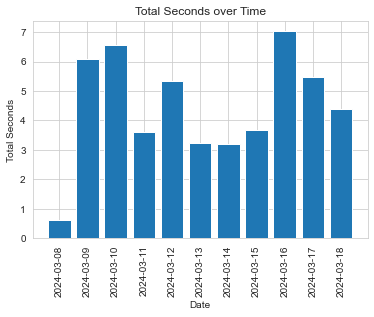

In [38]:

# Plotting as bar chart
plt.bar(sot['Date'], sot['total_seconds']/3600)
# by dividing 3600 sec converted to hours
# Formatting x-axis to show all dates
plt.xticks(sot['Date'], rotation=90)

plt.xlabel('Date')
plt.ylabel('Total Seconds')
plt.title('Total Seconds over Time')

plt.show()

## finding which days have highest screen on time of week

In [39]:
sotd = ref[['day_of_week','total_seconds']].groupby('day_of_week').sum()
sotd = sotd.reset_index()
sotd

,day_of_week,total_seconds
0,Friday,15488
1,Monday,28816
2,Saturday,47181
3,Sunday,43274
4,Thursday,11550
5,Tuesday,19182
6,Wednesday,11669


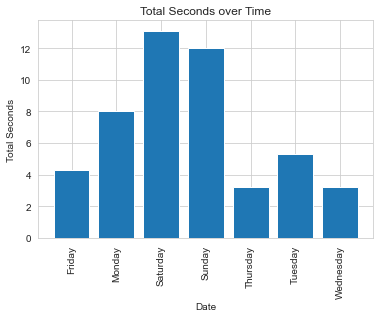

In [40]:
# Plotting as bar chart
plt.bar(sotd['day_of_week'], sotd['total_seconds']/3600)
# by dividing 3600 sec converted to hours
# Formatting x-axis to show all dates
plt.xticks(sotd['day_of_week'], rotation=90)

plt.xlabel('Date')
plt.ylabel('Total Seconds')
plt.title('Total Seconds over Time')

plt.show()

# now lets check the app usages 

In [41]:
app_time_sum = ref.groupby('appname')['total_seconds'].sum()
app_time_sum 

appname
Calculator             561
Call                 25738
Camera                 600
Chrome                6151
Clock                  764
Flipkart              2931
GPay                  1464
Gallery                588
Google Play Store      729
Instagram            59599
Launcher               231
Maps                  7246
Messages              1055
Phone                 5024
PhonePe               2373
Snapchat              7790
Spotify               2162
Truecaller             339
WhatsApp             17775
YouTube              24841
other                 9199
Name: total_seconds, dtype: int32

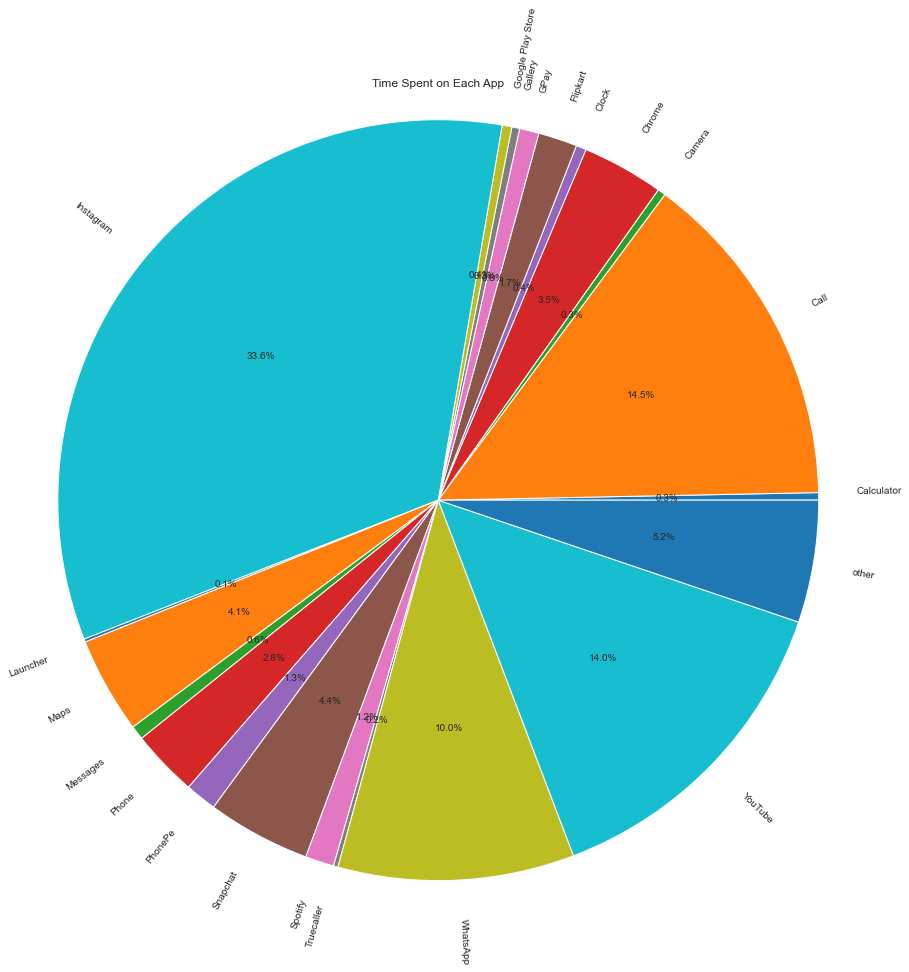

In [42]:
# Plot a pie chart
plt.figure(figsize=(15, 15))
plt.pie(app_time_sum, labels=app_time_sum.index, autopct='%1.1f%%', rotatelabels=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Time Spent on Each App')
plt.show()

## find the app i use after one app

In [43]:
data = ref['appname'].tolist()

In [44]:

def find_max_frequent_pair(df):
  """
  This function finds the pair of numbers that occurs the most times in a list,
  ignoring pairs of the same number.

  Args:
      data: A list of integers.

  Returns:
      A tuple containing the most frequent pair and its frequency.
  """

  # Create a dictionary to store the frequency of each pair.
  pair_counts = {}
  for i in range(len(data) - 1):
    # Check if the current and next elements are different to avoid same number pairs.
    if data[i] != data[i + 1]:
      current_pair = (data[i], data[i + 1])
      # Increment the count for the current pair or initialize it to 1 if not seen before.
      pair_counts[current_pair] = pair_counts.get(current_pair, 0) + 1
  
  return pair_counts
""" 
  # Find the pair with the maximum frequency.
  max_frequency = 0
  most_frequent_pair = None
  most2 = None
  most3 = None
  for pair, count in pair_counts.items():
    if count > max_frequency:
      max_frequency = count
      most_frequent_pair = pair

  return most_frequent_pair, max_frequency
 """  
# Find the most frequent pair
most_frequent_pair = find_max_frequent_pair(data)

print(most_frequent_pair)

{('other', 'WhatsApp'): 26, ('WhatsApp', 'other'): 29, ('WhatsApp', 'Google Play Store'): 3, ('Google Play Store', 'Phone'): 3, ('Phone', 'Call'): 272, ('Call', 'Phone'): 375, ('Phone', 'WhatsApp'): 47, ('WhatsApp', 'Phone'): 42, ('other', 'Camera'): 1, ('Camera', 'WhatsApp'): 3, ('Call', 'Chrome'): 7, ('Chrome', 'Launcher'): 3, ('Launcher', 'Phone'): 4, ('Phone', 'Launcher'): 10, ('Launcher', 'WhatsApp'): 10, ('WhatsApp', 'Launcher'): 9, ('Launcher', 'Spotify'): 7, ('Spotify', 'Launcher'): 9, ('Launcher', 'Maps'): 4, ('Maps', 'Launcher'): 4, ('Launcher', 'Instagram'): 13, ('Instagram', 'Launcher'): 11, ('Launcher', 'Chrome'): 3, ('Instagram', 'Google Play Store'): 5, ('Google Play Store', 'Instagram'): 5, ('Launcher', 'Call'): 7, ('Instagram', 'Spotify'): 4, ('Launcher', 'GPay'): 1, ('GPay', 'Launcher'): 1, ('WhatsApp', 'Instagram'): 84, ('Instagram', 'WhatsApp'): 144, ('WhatsApp', 'Spotify'): 7, ('Call', 'Launcher'): 1, ('Spotify', 'Snapchat'): 9, ('Snapchat', 'Maps'): 7, ('Maps', 'S

In [45]:
my_dict = most_frequent_pair

# Sort by values (using list of tuples) in descending order
sorted_by_value = sorted(my_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_by_value)  # Output: [('a', 10), ('c', 7), ('b', 3)] (key-value pairs sorted by value in descending order)


[(('Call', 'Phone'), 375), (('Phone', 'Call'), 272), (('Instagram', 'WhatsApp'), 144), (('WhatsApp', 'Instagram'), 84), (('WhatsApp', 'Call'), 54), (('Phone', 'Instagram'), 50), (('Phone', 'WhatsApp'), 47), (('WhatsApp', 'Snapchat'), 46), (('Truecaller', 'Call'), 43), (('WhatsApp', 'Phone'), 42), (('Snapchat', 'WhatsApp'), 35), (('Snapchat', 'Instagram'), 32), (('YouTube', 'Instagram'), 30), (('WhatsApp', 'other'), 29), (('other', 'WhatsApp'), 26), (('Instagram', 'Snapchat'), 26), (('WhatsApp', 'Chrome'), 24), (('Chrome', 'WhatsApp'), 22), (('WhatsApp', 'YouTube'), 21), (('Phone', 'Snapchat'), 21), (('Instagram', 'other'), 21), (('Instagram', 'Call'), 21), (('Call', 'Instagram'), 20), (('Call', 'Truecaller'), 19), (('Phone', 'Truecaller'), 19), (('YouTube', 'WhatsApp'), 18), (('other', 'Instagram'), 18), (('Flipkart', 'WhatsApp'), 17), (('Maps', 'WhatsApp'), 16), (('Snapchat', 'Call'), 16), (('Instagram', 'YouTube'), 16), (('Snapchat', 'Phone'), 15), (('other', 'Truecaller'), 15), (('I

In [46]:
ref

,appname,Date,DateTime,total_seconds,day_of_week
0,other,2024-03-18,2024-03-18 14:54:16,1,Monday
1,WhatsApp,2024-03-18,2024-03-18 14:54:04,11,Monday
2,other,2024-03-18,2024-03-18 14:52:58,59,Monday
3,other,2024-03-18,2024-03-18 14:52:58,0,Monday
4,other,2024-03-18,2024-03-18 14:52:09,0,Monday
...,...,...,...,...,...
5675,Instagram,2024-03-08,2024-03-08 22:22:55,151,Friday
5676,Flipkart,2024-03-08,2024-03-08 22:21:07,66,Friday
5677,WhatsApp,2024-03-08,2024-03-08 22:18:52,129,Friday
5680,other,2024-03-08,2024-03-08 22:17:04,4,Friday


## trying to find which time period i use phone most of the day

In [47]:
dfs = []
for i in range (0,23):
    # Specify the time range
    start_time = str(i) + ':00:00'
    end_time = str(i+1) + ':00:00'

    # Convert start and end time strings to datetime objects
    start_time_dt = pd.to_datetime(start_time, format='%H:%M:%S').time()
    end_time_dt = pd.to_datetime(end_time, format='%H:%M:%S').time()

    # Filter the data
    filtered_data = ref[(ref['DateTime'].dt.time >= start_time_dt) & (ref['DateTime'].dt.time <= end_time_dt)]

    temp = filtered_data.groupby('Date')['total_seconds'].sum()/60
    temp = temp.reset_index()
    temp['timestamp'] = start_time + " " + end_time
    dfs.append(temp)
    appended_df = pd.concat(dfs, ignore_index=True)
   

In [48]:
appended_df.drop(columns='Date')

,total_seconds,timestamp
0,15.350000,0:00:00 1:00:00
1,14.350000,0:00:00 1:00:00
2,21.850000,0:00:00 1:00:00
3,4.316667,0:00:00 1:00:00
4,46.183333,1:00:00 2:00:00
...,...,...
166,13.116667,22:00:00 23:00:00
167,6.616667,22:00:00 23:00:00
168,28.733333,22:00:00 23:00:00
169,26.016667,22:00:00 23:00:00


In [71]:
NEW = appended_df.groupby('timestamp')['total_seconds'].sum().sort_values(ascending=False)
NEW

timestamp
8:00:00 9:00:00      226.566667
13:00:00 14:00:00    199.650000
7:00:00 8:00:00      191.800000
12:00:00 13:00:00    190.933333
21:00:00 22:00:00    185.433333
9:00:00 10:00:00     175.333333
11:00:00 12:00:00    171.933333
20:00:00 21:00:00    170.450000
19:00:00 20:00:00    169.100000
16:00:00 17:00:00    155.100000
22:00:00 23:00:00    136.966667
14:00:00 15:00:00    135.700000
10:00:00 11:00:00    121.966667
2:00:00 3:00:00      113.483333
15:00:00 16:00:00    112.066667
18:00:00 19:00:00    104.350000
17:00:00 18:00:00     91.600000
0:00:00 1:00:00       55.866667
1:00:00 2:00:00       46.183333
3:00:00 4:00:00       32.900000
6:00:00 7:00:00        9.433333
4:00:00 5:00:00        4.900000
5:00:00 6:00:00        1.183333
Name: total_seconds, dtype: float64

In [81]:
NEW.sum()

2802.9

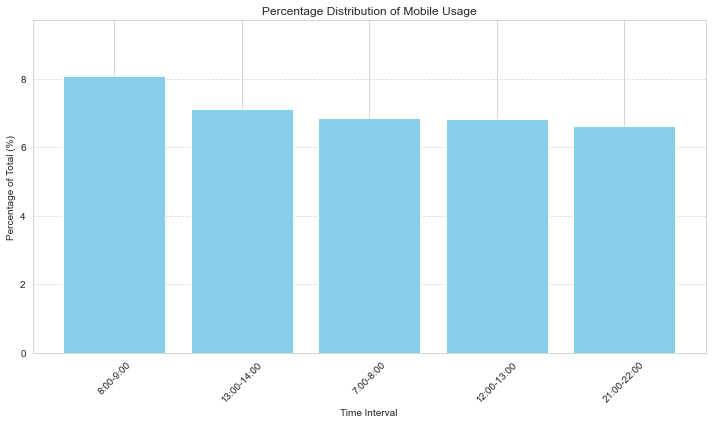

In [85]:
import numpy as np
# Total
total = 2802.9
NEW = {
    '8:00-9:00': 226.566667,
    '13:00-14:00': 199.650000,
    '7:00-8:00': 191.800000,
    '12:00-13:00': 190.933333,
    '21:00-22:00': 185.433333
}

# Calculate percentages
percentages = [(value / total) * 100 for value in NEW.values()]

# Extract labels and values for the first 5 points
labels = list(NEW.keys())[:5]
percentages = percentages[:5]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color='skyblue')
plt.xlabel('Time Interval')
plt.ylabel('Percentage of Total (%)')
plt.title('Percentage Distribution of Mobile Usage')
plt.xticks(rotation=45)
plt.ylim(0, max(percentages) * 1.2)  # Adjust ylim for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
#data is from 18/3 to 8/3
usg = pd.read_csv('usages.csv')
usg

,App name,Usage time,Access count
0,Instagram,16:33:15,353
1,Call,7:09:06,549
2,YouTube,6:54:05,125
3,WhatsApp,4:58:22,469
4,Snapchat,2:11:14,195
5,Maps,2:00:49,90
6,Chrome,1:42:34,104
7,Phone,1:24:10,658
8,Flipkart,0:48:50,30
9,PhonePe,0:39:34,161


In [51]:
usg.rename(columns={'Usage time':'usage_time','Access count':'ascess_count','App name':'appname'},inplace=True)

In [52]:
usg['usage_time'] = pd.to_timedelta(usg['usage_time'])

In [53]:
usg['usage_time'] = usg['usage_time'].dt.total_seconds()

In [54]:
usg

,appname,usage_time,ascess_count
0,Instagram,59595.0,353
1,Call,25746.0,549
2,YouTube,24845.0,125
3,WhatsApp,17902.0,469
4,Snapchat,7874.0,195
5,Maps,7249.0,90
6,Chrome,6154.0,104
7,Phone,5050.0,658
8,Flipkart,2930.0,30
9,PhonePe,2374.0,161


In [55]:
#catagorise the columns
app_social = ['Instagram','YouTube','Snapchat']
app_entertain = ['YouTube','Spotify','MX Player']
app_productive = ['WhatsApp','Maps','Chrome','Phone','Call','Messages']
app_ecom = ['Flipkart','PhonePe','GPay','Amazon','Swiggy']


In [56]:
usg.replace(app_social,'SOCIALMEDIA',inplace=True)
usg.replace(app_entertain,'ENTERTAINMENT',inplace=True)
usg.replace(app_productive,'PRODUCTIVITY',inplace=True)
usg.replace(app_ecom,'ECOM',inplace=True)

In [57]:
categories_to_keep = ['SOCIALMEDIA', 'ENTERTAINMENT', 'PRODUCTIVITY', 'ECOM']
usg = usg[usg['appname'].isin(categories_to_keep)]


In [58]:
usg = usg.groupby('appname').sum()
usg.reset_index(inplace=True)

In [59]:
usg

,appname,usage_time,ascess_count
0,ECOM,7758.0,236
1,ENTERTAINMENT,2191.0,94
2,PRODUCTIVITY,63158.0,1895
3,SOCIALMEDIA,92314.0,673


In [62]:
import plotly.express as px
fig = px.pie(usg, names='appname', values='usage_time', title='App Usages Distribution',
             hover_data={'appname': True, 'ascess_count': True},
             color_discrete_sequence=px.colors.qualitative.Pastel)  # Using a pastel color palette
             
fig.update_traces(textposition='inside', textinfo='percent+label')  # Place labels inside the pie chart slices, show percentages and labels
fig.update_layout(showlegend=True, legend_title_text='App Name', margin=dict(t=50, b=50, l=50, r=50))  # Show legend, set legend title, adjust margins
fig.show()

In [68]:
fig = go.Figure(data=go.Scatter(x=usg['usage_time']/3600, y=usg['ascess_count'], mode='lines+markers',hovertext=usg['appname']))
fig.update_layout(title='App Access Count', xaxis_title='TIME SPENT', yaxis_title='Access Count')
fig.update_xaxes(type='category')  # Ensure 'appname' is treated as categorical data
fig.show()

In [65]:
#data is from 18/3 to 8/3
usg1 = pd.read_csv('usages.csv')
usg1.rename(columns={'Usage time':'usage_time','Access count':'ascess_count','App name':'appname'},inplace=True)
usg1['usage_time'] = pd.to_timedelta(usg1['usage_time'])
usg1['usage_time'] = usg1['usage_time'].dt.total_seconds()

In [66]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=usg1['appname'], y=usg1['ascess_count'], mode='lines+markers'))
fig.update_layout(title='App Access Count', xaxis_title='App Name', yaxis_title='Access Count')
fig.update_xaxes(type='category')  # Ensure 'appname' is treated as categorical data
fig.show()
